### Business Problem
The aim is to analyze the market data and provide guidance to the XYZ client regarding the cab company that they should invest in.

### Hypothesis
1. What is the age range of our target audience?
2. What is the income level of our target audience?
3. Does the profit tend to be higher on weekends or weekdays?
4. Which cities have a high demand for rides? In which cities does the cab industry have potential for growth?
5. What is the gender distribution among cab users?
6. What is the per kilometer charge of cab companies in different cities?
7. Which company generates the highest profit on a yearly and monthly basis?
8. What are the variations in profit among different companies?
9. How do holidays affect the demand for cab rides?
10. Is the profit proportional to the distance traveled?
11. What is the average annual profit earned per ride by each cab company?
12. What is the average profit earned per ride statistics for both companies?
13. what is the market share of both companies?
14. What is the demand for each company in different cities?
15. What is the profit margin for each company?

### Library

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import math
import calendar
import matplotlib

### Datasets

In [455]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [456]:
Transaction_ID =  pd.read_csv("Transaction_ID.csv")
Transaction_ID.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [457]:
city_data = pd.read_csv("City.csv")
city_data.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [458]:
Customer_ID = pd.read_csv("Customer_ID.csv")
Customer_ID.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [459]:
holiday_data = pd.read_csv("US Holiday Dates (2004-2021).csv")
holiday_data.head(2)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005


In [491]:
#merging Transaction_Id and Customer_ID dataset
new_data = pd.merge(Transaction_ID,Customer_ID,on='Customer ID')

#merging cab_data with new_data dataset
master_data = pd.merge(cab_data, new_data, on = 'Transaction ID').drop(['Date of Travel','Customer ID'], axis=1)

#master dataset
master_data.head(2)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,holiday,Year,Month,Day,Weekday,Profit,Profit_rate,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,False,2016,1,7,3,57.315,18.27,Card,Male,28,10813
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,False,2016,1,5,1,23.666,7.07,Card,Male,27,9237


### Data Understanding

In [478]:
print(cab_data.dtypes,"\n")
print("Null Values: ", cab_data.isnull().any().any(),"\n")
print("Shape of Dataset: ",cab_data.shape)

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
holiday                     bool
Year                       int64
Month                      int64
Day                        int64
Weekday                    int64
Profit                   float64
Profit_rate              float64
dtype: object 

Null Values:  False 

Shape of Dataset:  (359392, 14)


In [479]:
print(Transaction_ID.dtypes,"\n")
print("Null Values: ", Transaction_ID.isnull().any().any(),"\n")
print("Shape of Dataset: ",Transaction_ID.shape)

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object 

Null Values:  False 

Shape of Dataset:  (440098, 3)


In [480]:
print(city_data.dtypes,"\n")
print("Null Values: ", city_data.isnull().any().any(),"\n")
print("Shape of Dataset: ",city_data.shape)

Population    int64
Users         int64
dtype: object 

Null Values:  False 

Shape of Dataset:  (20, 2)


In [481]:
print(Customer_ID.dtypes,"\n")
print("Null Values: ", Customer_ID.isnull().any().any(),"\n")
print("Shape of Dataset: ",Customer_ID.shape)

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object 

Null Values:  False 

Shape of Dataset:  (49171, 4)


In [482]:
print(holiday_data.dtypes,"\n")
print("Null Values: ", holiday_data.isnull().any().any(),"\n")
print("Shape of Dataset: ",holiday_data.shape)

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object 

Null Values:  False 

Shape of Dataset:  (342, 6)


In [492]:
print(master_data.dtypes,"\n")
print("Null Values: ", master_data.isnull().any().any(),"\n")
print("Shape of Dataset: ",master_data.shape)

Transaction ID          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
holiday                  bool
Year                    int64
Month                   int64
Day                     int64
Weekday                 int64
Profit                float64
Profit_rate           float64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object 

Null Values:  False 

Shape of Dataset:  (359392, 17)


In [465]:
# only for 49k customers we know there gender, age and income
print("No of Customers whose gender, age and income is known are",Customer_ID.shape[0])

# For 80k customers we don't know which cab company they use
print("No of Customers we don't know which cab company they use are ",Transaction_ID.shape[0]- cab_data.shape[0])

print("Total Number of Rides : ", Transaction_ID.shape[0])

No of Customers whose gender, age and income is known are 49171
No of Customers we don't know which cab company they use are  80706
Total Number of Rides :  440098


In [467]:
print("No of Cities in City Dataset: ",len(city_data.index.unique()))

No of Cities in City Dataset:  20


In [468]:
# total cities
print("No of Cities in Cab Dataset: ", len(cab_data['City'].unique()))

No of Cities in Cab Dataset:  19


### Data Preprocessing

In [469]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [470]:
cab_data['holiday'] = cab_data['Date of Travel'].isin(holiday_data['Date']).astype(bool)
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: to_date_format(x))
cab_data['Year'] = cab_data['Date of Travel'].apply(lambda x: x.year)
cab_data['Month'] = cab_data['Date of Travel'].apply(lambda x: x.month)
cab_data['Day'] = cab_data['Date of Travel'].apply(lambda x: x.day)

cab_data['Weekday'] = cab_data['Date of Travel'].apply(lambda x: x.weekday())
cab_data['holiday'] = cab_data['Weekday'].apply(lambda x: True if x in [5,6] else False)
cab_data["Profit"] = cab_data["Price Charged"] - cab_data["Cost of Trip"] 
cab_data['Profit_rate'] = round((cab_data["Profit"] / cab_data["Cost of Trip"])*100,2)

In [472]:
#City dataset
city_data.Population = [city_data.Population[i].replace(",", "") for i in range(len(city_data))]
city_data.Users = [city_data.Users[i].replace(",", "") for i in range(len(city_data))]

city_data['Population'] = city_data['Population'].astype('int64')
city_data['Users'] = city_data['Users'].astype('int64')

city_data.set_index("City", inplace=True)

city_data.sort_values('Users', ascending=False, inplace=True)

In [493]:
# Age-Group dataset
master_data['Age-group'] = master_data['Age'].apply(lambda x: "(under 20)" if x<=20 else ("(21-30)" if (x>20 and x<=30) else ("(31-40)" if (x>30 and x<=40) else("(41-50)" if (x>40 and x<=50) else "(Above 50)")) ))

#Binning income levels
bins = [0, 2670.5, 4451.5, 8903.5, 20030.5, 35000.5]
label = ['low', 'low-middle', 'middle', 'upper-middle', 'high']
master_data['Income_levels'] = pd.cut(master_data["Income (USD/Month)"], bins = bins, labels = label)


### Data Analysis

### Age-Group of target audience 

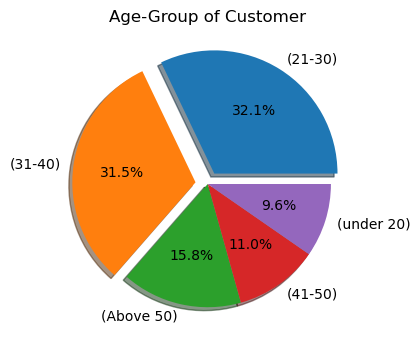

In [497]:
data_pie= master_data['Age-group'].value_counts(normalize=True)*100

data = pd.DataFrame({'Age-groups': data_pie.index,'Percentage':data_pie.values})

#plotting pie chart
explode = (0.1, 0.1, 0.0, 0.0, 0.0)
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

plt.figure(figsize=(8,4))
plt.pie(data['Percentage'],labels=data['Age-groups'], startangle=360, center = (0,0), explode = explode,shadow = True,autopct = lambda pct: func(pct, data['Percentage']))
plt.title("Age-Group of Customer")
plt.show()

### Income level of target audience

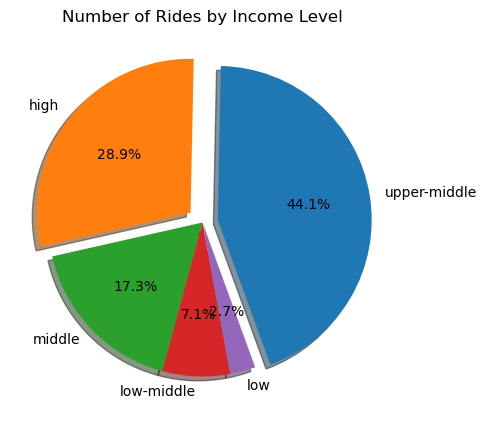

In [500]:
Income_levels = pd.DataFrame(master_data['Income_levels'].value_counts()).reset_index().rename(columns={"index":"Income Level", "Income_levels" : "Rides"})
Income_levels

plt.figure(figsize=(8,5))
plt.pie(Income_levels['Rides'],labels=Income_levels['Income Level'], startangle=290, center = (0,0), explode = explode,shadow = True, autopct='%1.1f%%')
plt.title("Number of Rides by Income Level")
plt.show()

### Gender distribution among cab users

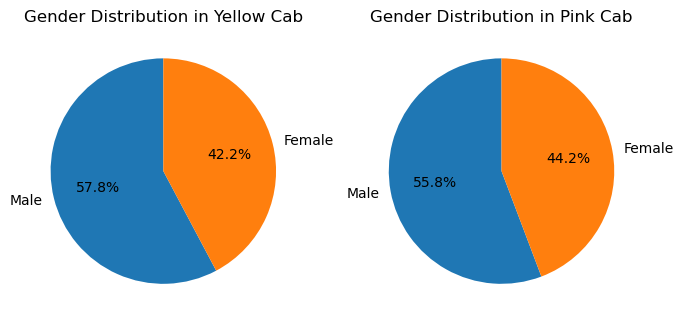

In [267]:
x = master_data[master_data['Company'] == "Yellow Cab"]['Gender'].value_counts(normalize=True)*100
y = master_data[master_data['Company'] == "Pink Cab"]['Gender'].value_counts(normalize=True)*100

gender_data = pd.concat((x,y),axis=1,keys = ["Yellow Cab","Pink Cab"])
gender_data.reset_index(inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].set_title('Gender Distribution in Yellow Cab')
axs[0].pie(gender_data['Yellow Cab'],labels=gender_data["index"], startangle=90, center = (0,0), autopct='%1.1f%%')

axs[1].set_title('Gender Distribution in Pink Cab')
axs[1].pie(gender_data['Pink Cab'],labels=gender_data["index"], startangle=90, center = (0,0),  autopct='%1.1f%%')


plt.show()

### Market share of both companies

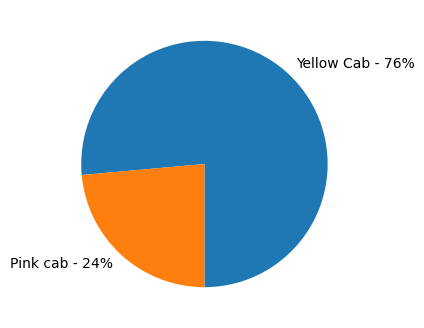

In [501]:
# No of rides each company has
rides= cab_data['Company'].value_counts(normalize =True)*100
Labels = ['Yellow Cab - 76%','Pink cab - 24%']
plt.figure(figsize=(8,4))
plt.pie(rides, startangle = 270,labels= Labels )
plt.show()

### Potential Growth for Cab Industry City wise

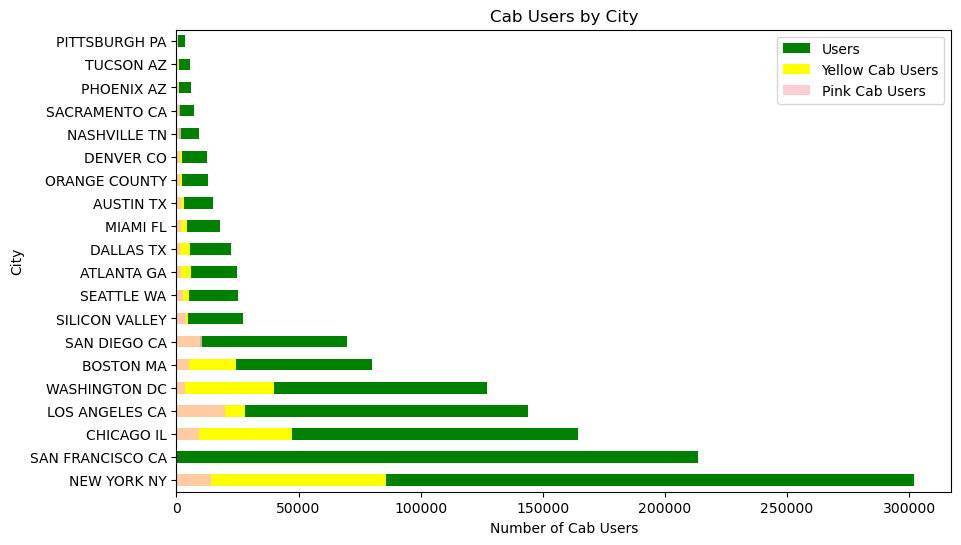

In [494]:
#cab users ofcab company
user_data_y = master_data[master_data['Company'] == "Yellow Cab"]['City'].value_counts()
user_data_p = master_data[master_data['Company'] == "Pink Cab"]['City'].value_counts()

#merging both datasets (yellow and pink dataset)
user_data = pd.concat([user_data_y, user_data_p], axis=1, keys = ['Yellow Cab Users','Pink Cab Users'])

#merging user data with city data
new_user_data = pd.concat([user_data, city_data],axis=1)

#reseting the index and renaming columns
df = new_user_data.reset_index().rename(columns={'index':'City'})

# sort the dataframe by the 'Users' column
df = df.sort_values('Users', ascending=False)

# create a horizontal bar chart for the 'Users' column
ax = df.plot(x="City", y='Users', kind='barh', color='green',figsize = (10,6))

# create a horizontal bar chart for the 'Yellow Cab Users' column and stack it on the 'Users' column
df.plot(x="City", y='Yellow Cab Users', kind='barh', stacked=True, color='yellow', ax=ax)

# create a horizontal bar chart for the 'Pink Cab Users' column and stack it on the 'Yellow Cab Users' column
df.plot(x="City", y='Pink Cab Users', kind='barh', stacked=True, color='pink', ax=ax, alpha=0.8)

# set the title and axis labels
plt.title('Cab Users by City')
plt.xlabel('Number of Cab Users')
plt.ylabel('City')
# display the plot
plt.show()

### Demand for rides City wise of both companies

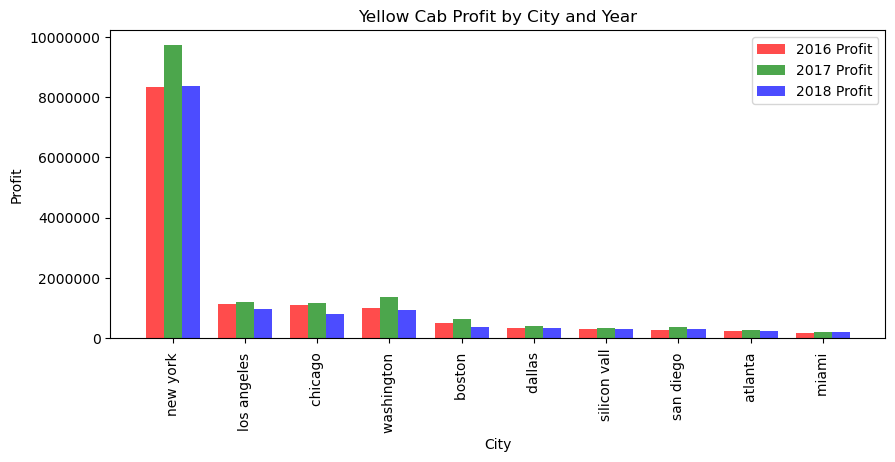

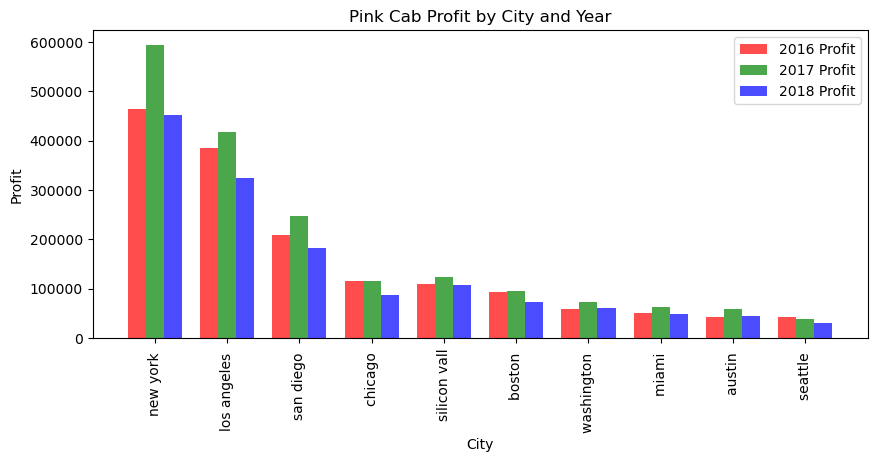

In [251]:
def city_profit(i):
    #Cab Company Profit per month
    city_2016 = cab_data[(cab_data['Company']== i) & (cab_data['Year'] == 2016)].groupby('City')['Profit'].sum().round(1).sort_values( ascending=False)
    city_2017 = cab_data[(cab_data['Company']== i) & (cab_data['Year'] == 2017)].groupby('City')['Profit'].sum().round(1).sort_values( ascending=False)
    city_2018 = cab_data[(cab_data['Company']== i) & (cab_data['Year'] == 2018)].groupby('City')['Profit'].sum().round(1).sort_values( ascending=False)

    city_profit = pd.concat([city_2016, city_2017, city_2018], axis=1, keys=['2016 Profit','2017 Profit','2018 Profit']).reset_index()
    city_profit['City'] = city_profit['City'].apply(lambda x: x[:-2].lower())
    return city_profit

def bar_plotting(df,title):
    city = df['City'].values
    profit_2016 = df['2016 Profit'].values
    profit_2017 = df['2017 Profit'].values
    profit_2018 = df['2018 Profit'].values
    
    # Set the width of the bars
    bar_width = 0.25

    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(profit_2016))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    
    plt.figure(figsize=(10, 4))
    # Create the bar chart
    plt.bar(r1, profit_2016, color='red', width=bar_width, label='2016 Profit', alpha=0.7)
    plt.bar(r2, profit_2017, color='green', width=bar_width , label='2017 Profit',alpha=0.7)
    plt.bar(r3, profit_2018, color='blue', width=bar_width, label='2018 Profit', alpha=0.7)

    # Add xticks on the middle of the group bars
    plt.xticks([r + bar_width for r in range(len(profit_2016))], city)

    # Set labels and title
    plt.xlabel('City')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ticklabel_format(style='plain', axis='y')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

#top 5 cities
ycp = city_profit("Yellow Cab").head(10)
pcp = city_profit("Pink Cab").head(10)
bar_plotting(ycp,title='Yellow Cab Profit by City and Year')
bar_plotting(pcp,title = 'Pink Cab Profit by City and Year')

### Top Cities with high demand for rides

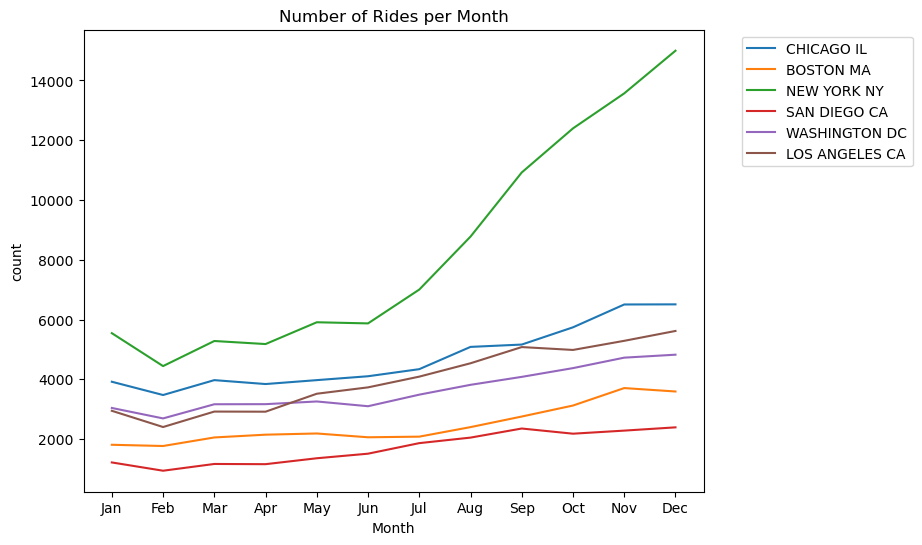

In [390]:
city_list = ['NEW YORK NY','LOS ANGELES CA','SAN DIEGO CA','CHICAGO IL','BOSTON MA','WASHINGTON DC']

city_count = cab_data.groupby(["City","Month"])["Transaction ID"].agg(['count']).reset_index().sort_values(by='count',ascending=False)
city_count['Month'] = city_count['Month'].apply(lambda x: calendar.month_abbr[x])

filtered_df = city_count[city_count['City'].isin(city_list)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
filtered_df = filtered_df.sort_values('Month', key = lambda x : pd.Categorical(x, categories=months, ordered=True))

plt.figure(figsize=(8, 6))
sns.lineplot(y="count",x="Month",hue="City",data= filtered_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Number of Rides per Month")
plt.show()

### Profit on a yearly and monthly basis of both companies


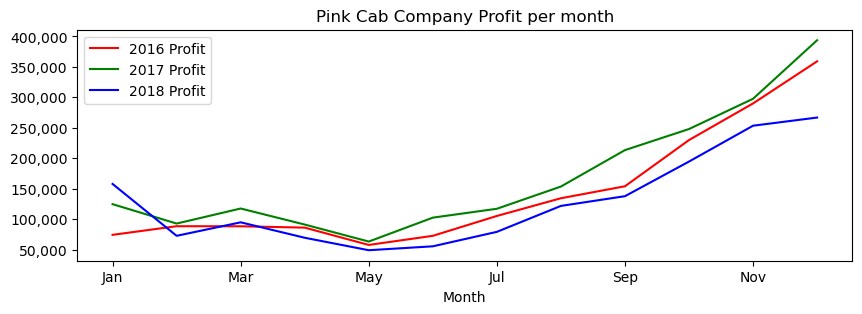

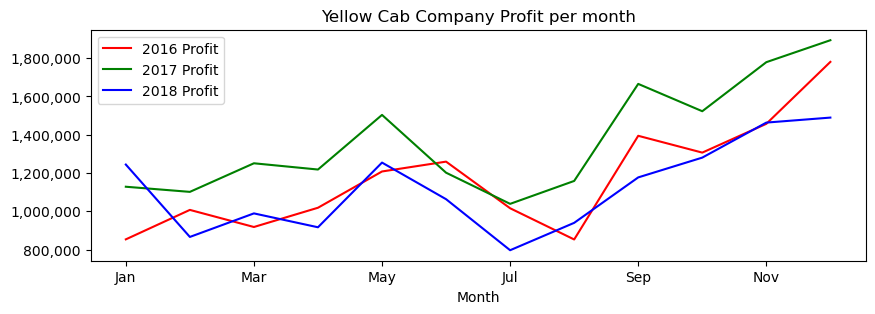

In [249]:
#dataset
def cab_profit(i):
    #Cab Company Profit per month
    cab_2016 = cab_data[(cab_data['Company']== i) & (cab_data['Year'] == 2016)].groupby('Month')['Profit'].sum().round(1)
    cab_2017 = cab_data[(cab_data['Company']== i) & (cab_data['Year'] == 2017)].groupby('Month')['Profit'].sum().round(1)
    cab_2018 = cab_data[(cab_data['Company']== i) & (cab_data['Year'] == 2018)].groupby('Month')['Profit'].sum().round(1)

    cab_profit = pd.concat([cab_2016, cab_2017, cab_2018], axis=1, keys=['2016 Profit','2017 Profit','2018 Profit']).reset_index()
    cab_profit['Month'] = cab_profit['Month'].apply(lambda x: calendar.month_abbr[x])
    
    return cab_profit


#plotting
def plotting(df,title, kind,x):
    ax = df.plot(x=x, y='2016 Profit',kind=kind,color='red', figsize=(10,3), title = title)
    df.plot(x=x, y='2017 Profit',kind=kind,color='green',ax=ax)
    df.plot(x=x, y='2018 Profit',kind=kind,color='blue', ax=ax)
    plt.ticklabel_format(style='plain', axis='y')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()
    
pink_profit = cab_profit('Pink Cab')
yellow_profit = cab_profit('Yellow Cab')

plotting(pink_profit, "Pink Cab Company Profit per month", kind='line', x ='Month')
plotting(yellow_profit, "Yellow Cab Company Profit per month", kind='line', x='Month')


### How do holidays affect the demand for cab rides?

<AxesSubplot:xlabel='Month'>

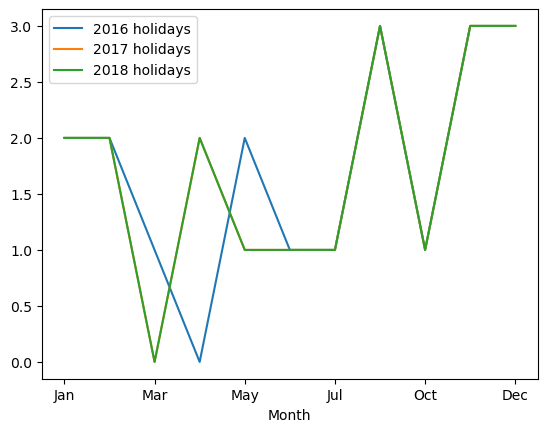

In [495]:
holiday_data['Count'] = 1

holiday_2016 = holiday_data[holiday_data['Year']==2016].groupby('Month')['Count'].sum()
holiday_2017 = holiday_data[holiday_data['Year']==2017].groupby('Month')['Count'].sum()
holiday_2018 = holiday_data[holiday_data['Year']==2018].groupby('Month')['Count'].sum()

holidays = pd.concat([holiday_2016, holiday_2017, holiday_2018], axis=1, keys=['2016 holidays','2017 holidays','2018 holidays']).reset_index()

holidays['Month'] = holidays['Month'].apply(lambda x: calendar.month_abbr[x])
holidays.fillna(0,inplace=True)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
holidays = holidays.sort_values('Month', key = lambda x : pd.Categorical(x, categories=months, ordered=True))

ax = holidays.plot(x='Month',y='2016 holidays')
holidays.plot(x='Month',y='2017 holidays',ax=ax)
holidays.plot(x='Month',y='2018 holidays',ax=ax)

### Observation:- Holidays do affect the demand for cab rides. In Month of November and December demand for ride is more beacuse of more holidays

### Variations in profit over the year among different companies

In [381]:
def deviation_dataframe(df,Company,year):
    list_p = []
    for i in year:
        list_p.append(round((df['{} Profit'.format(i)].std()/df['{} Profit'.format(i)].mean())*100,2))
    Data_frame = pd.DataFrame({"Company":Company,"Year" : year,"% of the deviation in earnings":list_p})
    return Data_frame

year = ["2016","2017","2018"]
pink_deviation = deviation_dataframe(pink_profit,"Pink Cab",year)
yellow_deviation = deviation_dataframe(yellow_profit,"Yellow Cab",year)
pd.concat((pink_deviation,yellow_deviation), axis=1 )

,Company,Year,% of the deviation in earnings,Company,Year,% of the deviation in earnings
0,Pink Cab,2016,66.97,Yellow Cab,2016,23.99
1,Pink Cab,2017,59.66,Yellow Cab,2017,21.08
2,Pink Cab,2018,58.02,Yellow Cab,2018,20.44


### Profit vs distance traveled

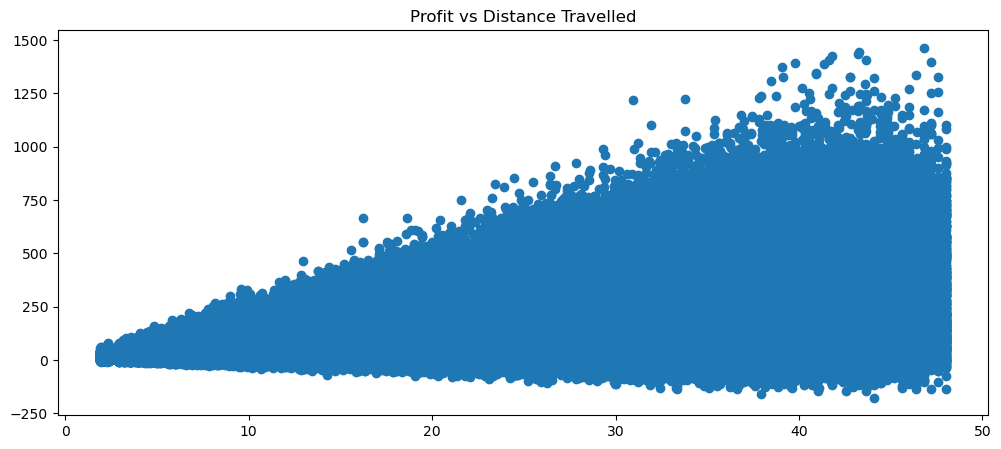

In [254]:
yellow_travel = cab_data[cab_data['Company'] == 'Yellow Cab']
plt.figure(figsize=(12,5))
plt.scatter(x = yellow_travel['KM Travelled'], y = yellow_travel['Profit'])
plt.title("Profit vs Distance Travelled")
plt.show()

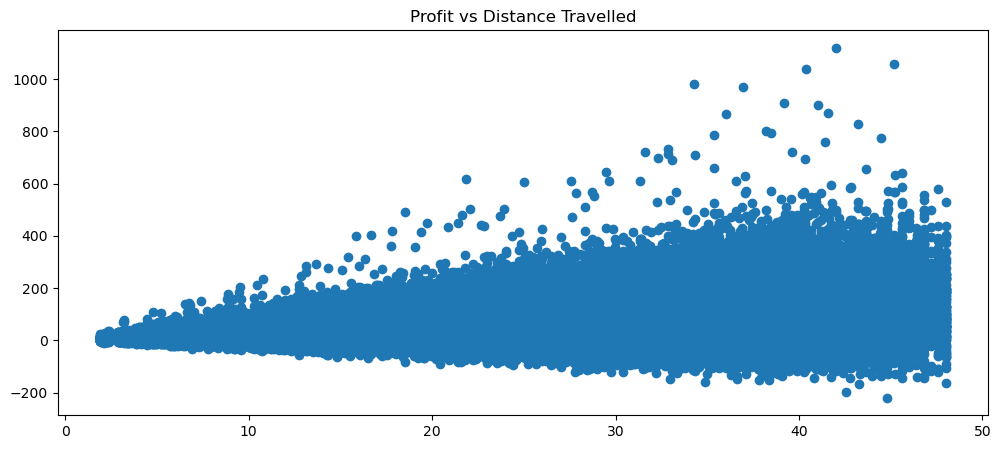

In [255]:
pink_travel = cab_data[cab_data['Company'] == 'Pink Cab']
plt.figure(figsize=(12,5))
plt.scatter(x = pink_travel['KM Travelled'], y = pink_travel['Profit'])
plt.title("Profit vs Distance Travelled")
plt.show()

### Average annual profit earned per ride by each cab company

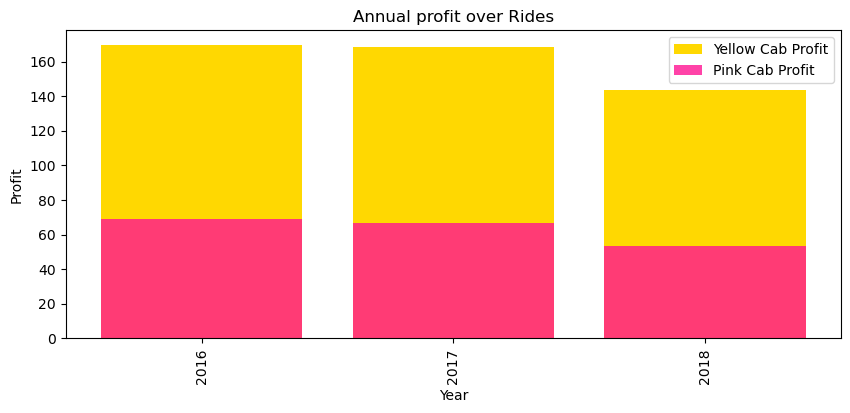

In [507]:
annual_profit = pd.concat((pink_travel.groupby("Year")['Profit'].mean(),yellow_travel.groupby("Year")['Profit'].mean()), axis=1,keys=["Pink Cab Profit","Yellow Cab Profit"])
annual_profit.reset_index(inplace=True)

annual_profit['Year'] = annual_profit['Year'].apply(lambda x: str(x))
annual_profit['Year'] = annual_profit['Year'].apply(lambda x: str(x))
fig, ax = plt.subplots(figsize=(10,4))

# Plot the data
y_plot = ax.bar(x=annual_profit['Year'], height=annual_profit['Yellow Cab Profit'], color = '#FFD801', label="Yellow Cab Profit")
p_plot = ax.bar(x=annual_profit['Year'], height=annual_profit['Pink Cab Profit'], color = '#FF1493', label="Pink Cab Profit", alpha=0.8)

#Add title to the plot
ax.set_title("Annual profit over Rides")

# Add legend to the plot
ax.legend()

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Profit')

# Rotate the x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

### Average profit earned per ride statistics for both companies

In [257]:
#profit per ride
def profit_stats(df,Company):
    list_stat = [df['Profit'].min(),df['Profit'].max(),df['Profit'].mean()]
    data = pd.DataFrame({"Profit stats":["{0}_min".format(Company),"{0}_max".format(Company),"{0}_mean".format(Company)],"Values":list_stat})
    return data
yellow_stats = profit_stats(yellow_travel,"Yellow Cab")
pink_stats = profit_stats(pink_travel,"Pink Cab")
pd.concat((yellow_stats, pink_stats), axis=1)

,Profit stats,Values,Profit stats,Values
0,Yellow Cab_min,-176.930800,Pink Cab_min,-220.060000
1,Yellow Cab_max,1463.966000,Pink Cab_max,1119.480000
2,Yellow Cab_mean,160.259986,Pink Cab_mean,62.652174


### Total income each year

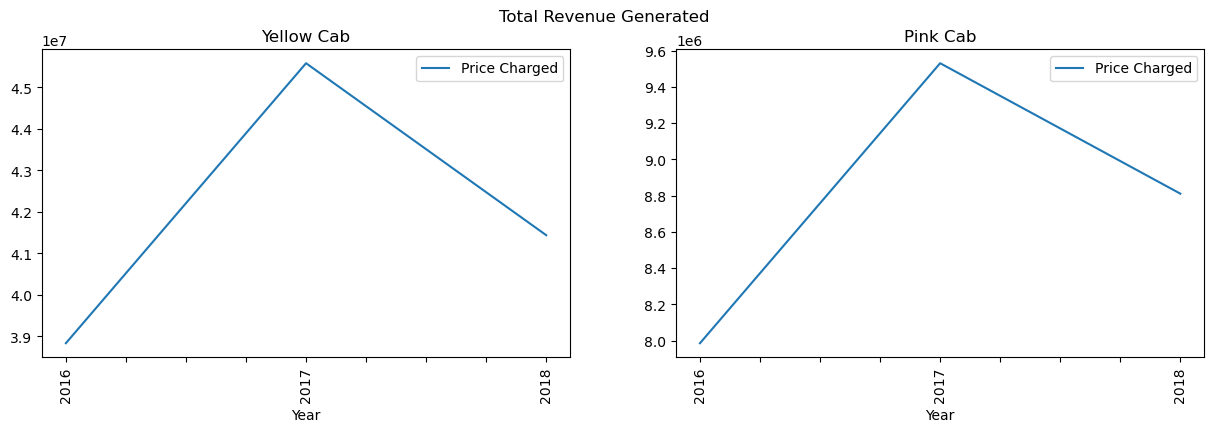

In [258]:
a = cab_data[cab_data.Company == "Yellow Cab"][["Price Charged","Year"]].groupby('Year').sum()
b = cab_data[cab_data.Company == "Pink Cab"][["Price Charged","Year"]].groupby('Year').sum()

a.reset_index(inplace=True)
b.reset_index(inplace=True)

a['Year'] = a['Year'].apply(lambda x: str(x))
b['Year'] = b['Year'].apply(lambda x: str(x))

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,4))
ax[0].set_title("Yellow Cab")
ax[1].set_title("Pink Cab")

a.plot(x='Year',y='Price Charged',rot=90,grid=False,kind="line", ax=ax[0])
b.plot(x='Year',y='Price Charged',rot=90,grid=False,kind="line", ax=ax[1])


fig.suptitle("Total Revenue Generated")
plt.show()

### 14. Demand for each company in different cities?

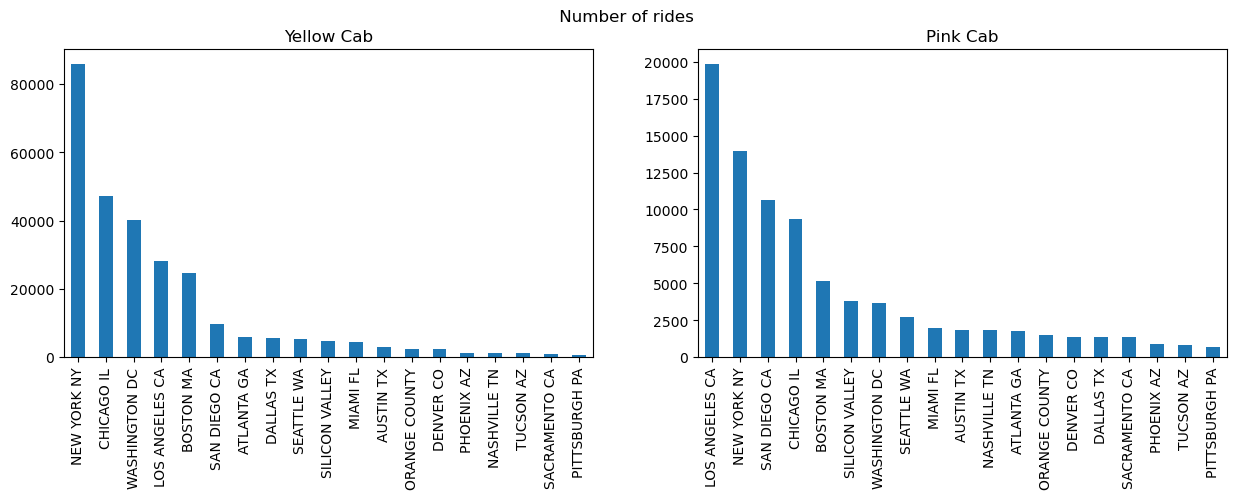

In [260]:
#city vise rides for each company
yellow_data = cab_data[cab_data['Company'] == "Yellow Cab"]['City'].value_counts()
pink_data = cab_data[cab_data['Company'] == "Pink Cab"]['City'].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,4))

yellow_data.plot(rot=90,grid=False, ax=ax[0], kind="bar")
pink_data.plot(rot=90, grid=False, ax=ax[1], kind ="bar")

ax[0].set_title("Yellow Cab")
ax[1].set_title("Pink Cab")

fig.suptitle(' Number of rides ')
plt.show()

### Revenue generated city vise for each company

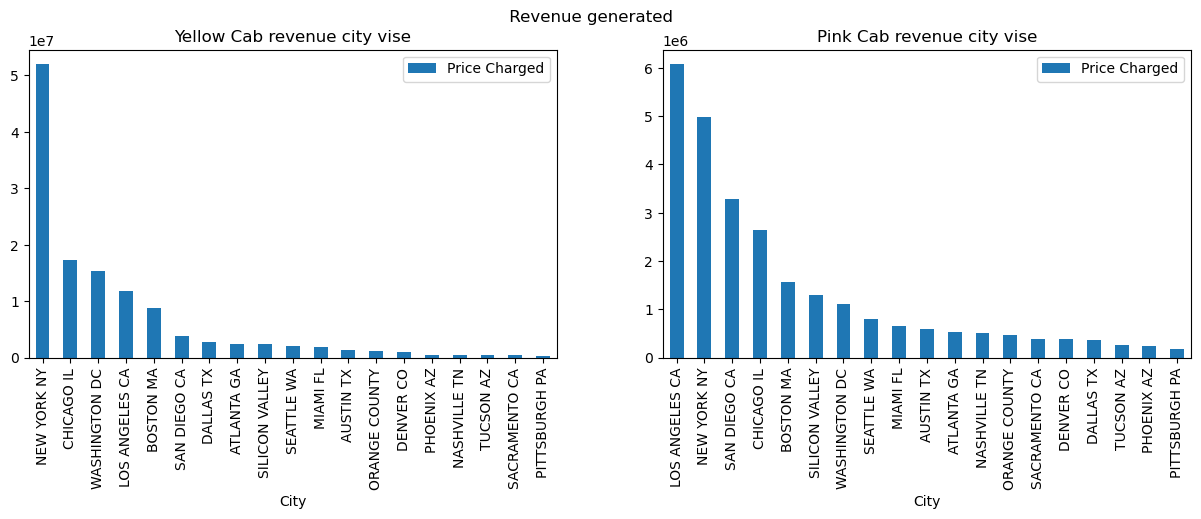

In [261]:
#Revenue generated city vise for each company
yellow_data = cab_data[cab_data['Company'] == "Yellow Cab"][['City','Price Charged']].groupby("City").sum()
pink_data = cab_data[cab_data['Company'] == "Pink Cab"][['City','Price Charged']].groupby("City").sum()

yellow_data.sort_values('Price Charged', ascending=False,inplace=True)
pink_data.sort_values('Price Charged', ascending=False,inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,4))

yellow_data.plot(rot=90,grid=False, ax=ax[0], kind = "bar")
pink_data.plot(rot=90, grid=False, ax=ax[1],  kind = "bar")

ax[0].set_title("Yellow Cab revenue city vise")
ax[1].set_title("Pink Cab revenue city vise")

fig.suptitle(' Revenue generated ')
plt.show()

### Price per kilometer of cab companies in different cities

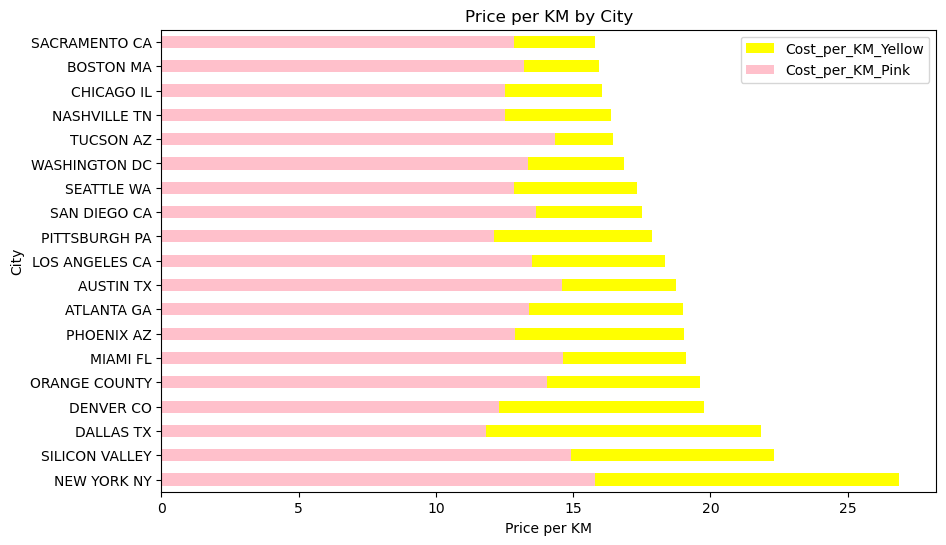

In [262]:
#Yellow company Price per KM by City
data_yellow = cab_data[cab_data['Company'] == "Yellow Cab"][['City','KM Travelled','Price Charged']].groupby("City").sum()
data_yellow['Cost_per_KM'] = data_yellow['Price Charged']/data_yellow['KM Travelled']

#Pink company Price per KM by City
data_pink = cab_data[cab_data['Company'] == "Pink Cab"][['City','KM Travelled','Price Charged']].groupby("City").sum()
data_pink['Cost_per_KM'] = data_pink['Price Charged']/data_pink['KM Travelled']

#reset index values
data_yellow.reset_index(inplace=True)
data_pink.reset_index(inplace=True)

#sort by values
data_yellow.sort_values('Cost_per_KM', ascending=False, inplace=True)
data_pink.sort_values('Cost_per_KM', ascending=False, inplace=True)

#merging both data
cost_data = pd.merge(data_yellow[['City','Cost_per_KM']],data_pink[['City','Cost_per_KM']], on='City', suffixes=('_Yellow', '_Pink'))

#plotting 
ax = cost_data.plot(x="City", y='Cost_per_KM_Yellow', kind='barh', color='yellow',figsize = (10,6))
cost_data.plot(x="City", y='Cost_per_KM_Pink', kind='barh', stacked=True, color='pink', ax=ax)

# set the title and axis labels
plt.title('Price per KM by City')
plt.xlabel('Price per KM')
plt.ylabel('City')
# display the plot
plt.show()

### Profit margin for each company

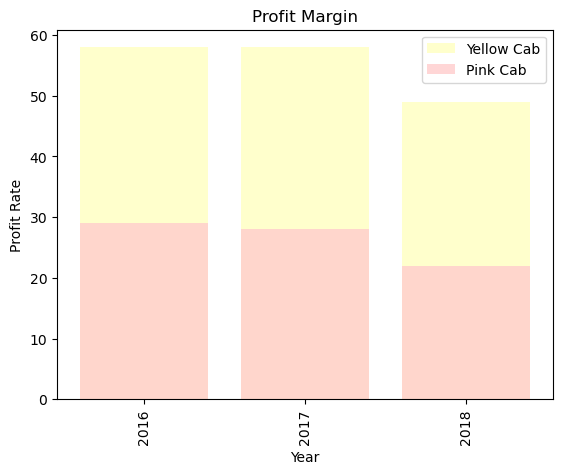

In [263]:
#yellow company profit margin over the year
y = cab_data[cab_data["Company"]=="Yellow Cab"].groupby("Year")["Profit_rate"].mean()
y = pd.DataFrame({"Year":y.index,"Profit_rate":y.values})
y['Profit_rate'] = y['Profit_rate'].apply(lambda x: math.ceil(x))

#pink company profit margin over the year
p = cab_data[cab_data["Company"]=="Pink Cab"].groupby("Year")["Profit_rate"].mean()
p = pd.DataFrame({"Year":p.index,"Profit_rate":p.values})
p['Profit_rate'] = p['Profit_rate'].apply(lambda x: math.ceil(x))

#convert year from integer to string
y['Year'] = y['Year'].apply(lambda x: str(x))
p['Year'] = p['Year'].apply(lambda x: str(x))

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the data
y_plot = ax.bar(x=y['Year'], height=y['Profit_rate'], color=(1.0, 1.0, 0.8), label="Yellow Cab")
p_plot = ax.bar(x=p['Year'], height=p['Profit_rate'], color=(1.0, 0.8, 0.8), label="Pink Cab", alpha=0.8)

#Add title to the plot
ax.set_title("Profit Margin")

# Add legend to the plot
ax.legend()

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Profit Rate')

# Rotate the x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

### Does the profit tend to be higher on weekends or weekdays?

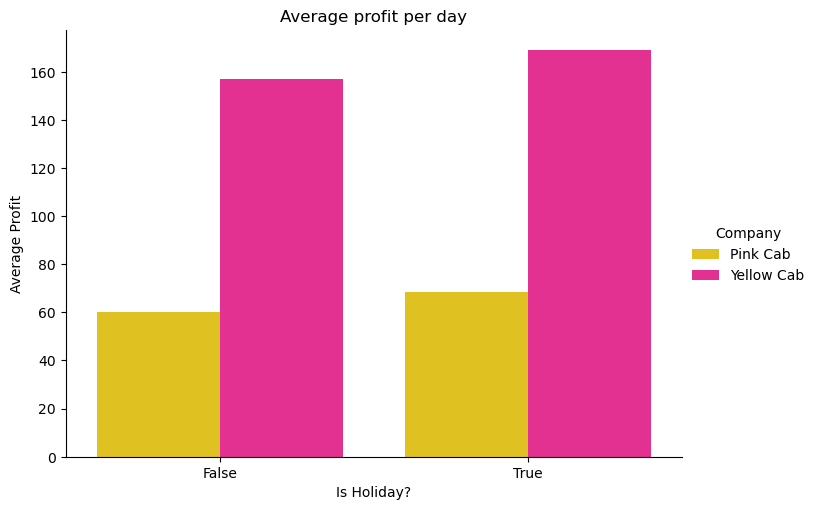

In [296]:
holiday_profit = pd.DataFrame(cab_data.groupby(["Company","holiday"])["Profit"].mean()).reset_index()

sns.catplot(x='holiday',y='Profit',data=holiday_profit,kind='bar',hue ="Company",palette=sns.color_palette(['#FFD801','#FF1493']), height=5, aspect=11.7/8.27)
plt.title('Average profit per day')
plt.ylabel('Average Profit')
plt.xlabel('Is Holiday?')
plt.show()


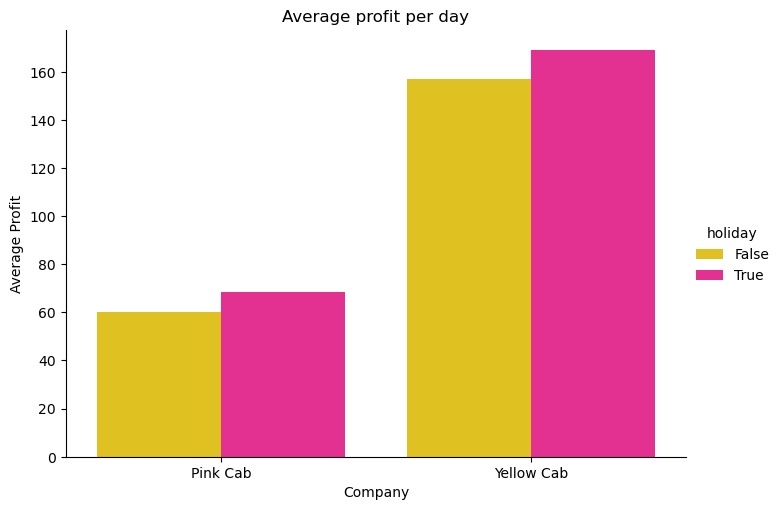

In [297]:
sns.catplot(x='Company',y='Profit',data=holiday_profit,kind='bar',hue ="holiday",palette=sns.color_palette(['#FFD801','#FF1493']), height=5, aspect=11.7/8.27)
plt.title('Average profit per day')
plt.ylabel('Average Profit')
plt.xlabel('Company')
plt.show()

### Observation:- Profit tends to be higher on weekends

### Conclusion

I would recommend XYZ client to invest in Yellow Cab compnay because of its huge market share, high profitability and low variation in profit over the year